## Neural Network

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import optimizers

### Load Sklearn Boston Housing Dataset

In [3]:
import pandas as pd
# Load the Boston Housing dataset from the original source, as suggested in the error message
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
# Assign the data and target to X and y
X = data
y = target

# Check the shape of training data
print(f"Features Shape = {X.shape}")
print(f"Predector Shape = {y.shape}")

Features Shape = (506, 13)
Predector Shape = (506,)


### Set up the network

In [7]:
network = models.Sequential()
network.add(layers.Input(shape=(13,)))
network.add(layers.Dense(24, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

### Configure the network with optimizer, loss function and accuracy

In [8]:
network.compile(optimizer=optimizers.RMSprop(learning_rate=0.01), # Changed 'lr' to 'learning_rate'
                loss='mse',
                metrics=['mae'])

network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 24)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

### Create training and test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(354, 13)

### Fit the network

In [11]:
history = network.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=18,
                    batch_size=20)

Epoch 1/18
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3503.1814 - mae: 39.2509 - val_loss: 1723.0289 - val_mae: 35.2108
Epoch 2/18
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 432.7817 - mae: 16.1590 - val_loss: 829.1256 - val_mae: 27.6477
Epoch 3/18
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 177.6967 - mae: 10.0312 - val_loss: 97.0558 - val_mae: 6.5282
Epoch 4/18
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121.4920 - mae: 8.3127 - val_loss: 76.2159 - val_mae: 6.7995
Epoch 5/18
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.4592 - mae: 6.6259 - val_loss: 181.6531 - val_mae: 12.0192
Epoch 6/18
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 143.7826 - mae: 9.5103 - val_loss: 125.9609 - val_mae: 9.1477
Epoch 7/18
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.0617 - mae: 7.1242 - val_loss: 67.1348 - val_mae: 7.2029
Epoch 8/18
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84.9039 - mae: 7.1271 - val_loss: 77.5862 - val_mae: 7.8135
Epoch 9/18
18/18 ━━━━━━━━━━━━━━━━━━━━ 

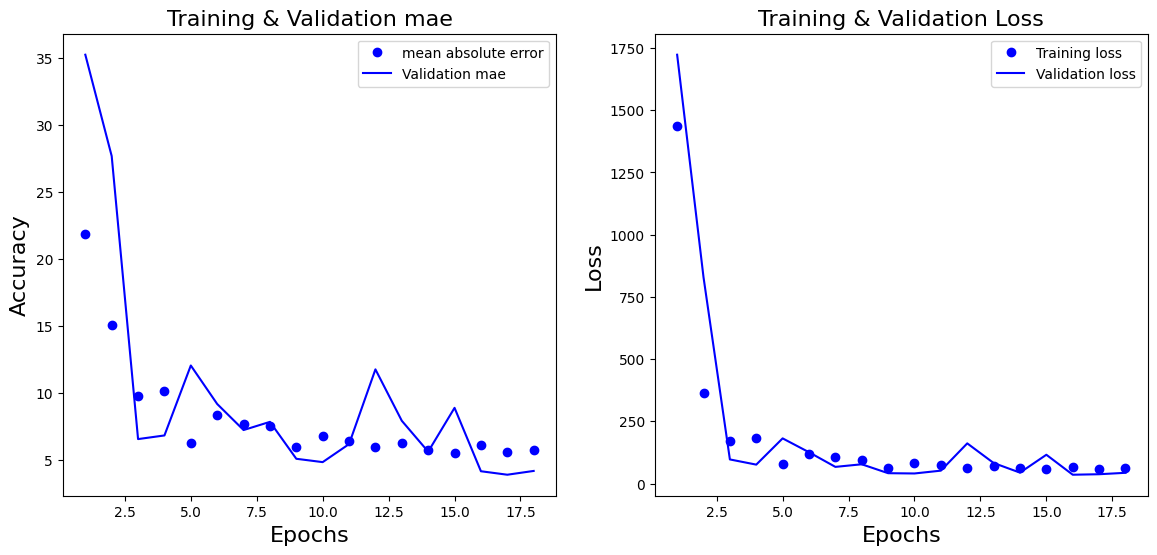

In [13]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model mean absolute error (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='mean absolute error')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation mae')
ax[0].set_title('Training & Validation mae', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

# Building an image recognition neural network

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

# Setting random seeds to get reproducible results
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

### Importing and reading the dataset

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("Size of the training set", len(x_train))
print("Size of the testing set", len(x_test))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Size of the training set 50000
Size of the testing set 10000


In [16]:
# we need to know the shape of each image
x_train.shape

(50000, 32, 32, 3)

The label is [1]


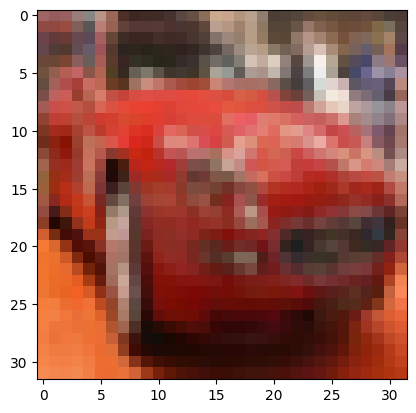

In [17]:
plt.imshow(x_train[5])
print("The label is", y_train[5])

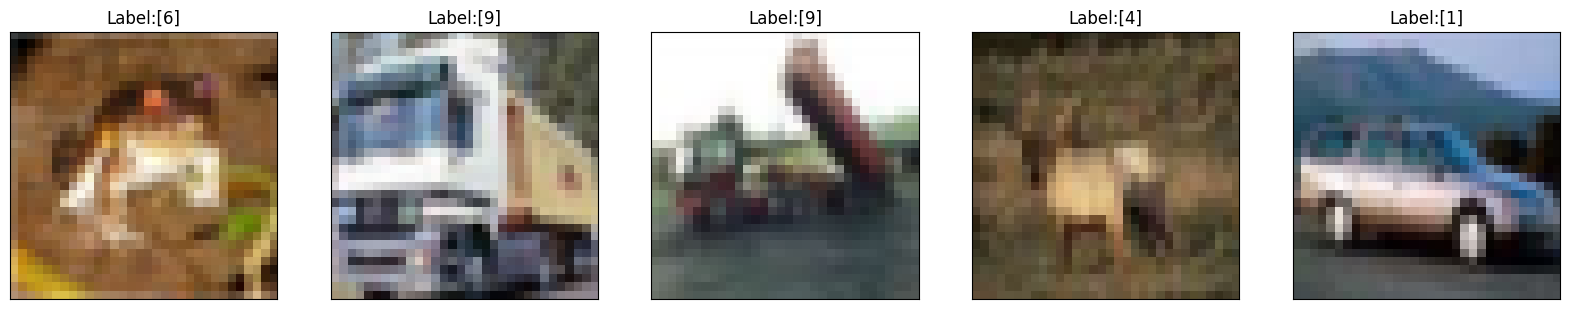

In [24]:
fig = plt.figure(figsize=(20,20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
    ax.set_title('Label:' + str(y_train[i]))

### Pre-processing the data

In [21]:
# Reshaping the features.
# In the reshape function we use the -1 as a placeholder for the size of the dataset.

x_train_reshaped = x_train.reshape(-1, 32*32*3) # Reshape to (num_samples, 32*32*3)
x_test_reshaped = x_test.reshape(-1, 32*32*3)   # Reshape to (num_samples, 32*32*3)

In [25]:
# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

### Building and training the neural network

In [29]:
# Imports
#import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
model.add(layers.Input(shape=(32*32*3,)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax')) #softmax act gives probability of each class

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(x_train_reshaped, y_train_cat, epochs=10, batch_size=1000)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.1049 - loss: 109.4420
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.1015 - loss: 2.3029
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.1015 - loss: 2.3027
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.1015 - loss: 2.3028
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.1015 - loss: 2.3029
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.1015 - loss: 2.3026
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.1009 - loss: 2.3028
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.1012 - loss: 2.3026
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.1022 - loss: 2.3026
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.1000 - loss: 2.3026


### Making predictions

In [31]:
predictions_vector = model.predict(x_test_reshaped)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [33]:
predictions = [np.argmax(pred) for pred in predictions_vector]

The label is [6]
The prediction is 6


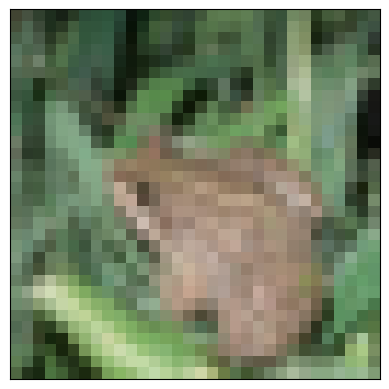

In [43]:
plt.imshow(x_test[4])
plt.xticks([])
plt.yticks([])
print("The label is", y_test[4])
print("The prediction is", predictions[4])

Sometimes the model makes mistakes too.

The label is [6]
The prediction is 6


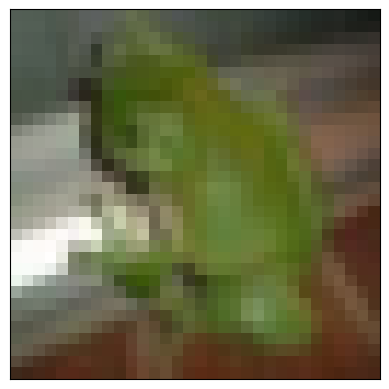

In [46]:
plt.imshow(x_test[7])
plt.xticks([])
plt.yticks([])
print("The label is", y_test[7])
print("The prediction is", predictions[7])

### Finding the accuracy of the model on the test set

In [47]:
num_correct = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        num_correct += 1

print("The model is correct", num_correct, "times out of", len(y_test))
print("The accuracy is", num_correct/len(y_test))

The model is correct 1000 times out of 10000
The accuracy is 0.1


**LAB TASK** <br>
create the model to have more parameters (more layers) , train it and check the test accuracy


In [ ]:
# Import necessary libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Size of the training set:", len(x_train))
print("Size of the testing set:", len(x_test))

# Preprocessing
# Reshape the data to fit the model input
x_train_reshaped = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train_reshaped = x_train_reshaped.astype('float32') / 255  # Normalize pixel values
x_test_reshaped = x_test_reshaped.astype('float32') / 255

Size of the training set: 60000
Size of the testing set: 10000


In [ ]:
# One-hot encode the labels




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Build the model
model = Sequential()
# Write the model Architecture


# Compile the model


# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model, complete between the parenthesis

history = model.fit()

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7609 - loss: 0.7602 - val_accuracy: 0.9507 - val_loss: 0.1596
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9349 - loss: 0.2225 - val_accuracy: 0.9631 - val_loss: 0.1209
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9508 - loss: 0.1688 - val_accuracy: 0.9675 - val_loss: 0.1051
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9579 - loss: 0.1461 - val_accuracy: 0.9712 - val_loss: 0.0976
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9605 - loss: 0.1301 - val_accuracy: 0.9748 - val_loss: 0.0859
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9650 - loss: 0.1193 - val_accuracy: 0.9742 - val_loss: 0.0843
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9681 - loss: 0.1074 - val_accuracy: 0.9767 - val_loss: 0.0797
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9700 - loss: 0.0993 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.0875
Test Accuracy: 97.80%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


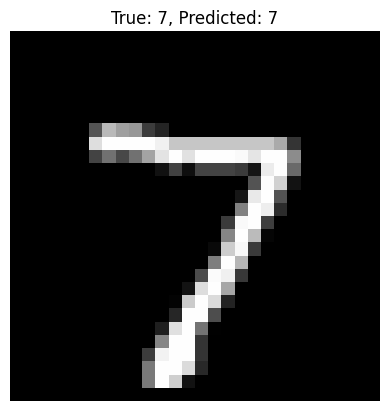

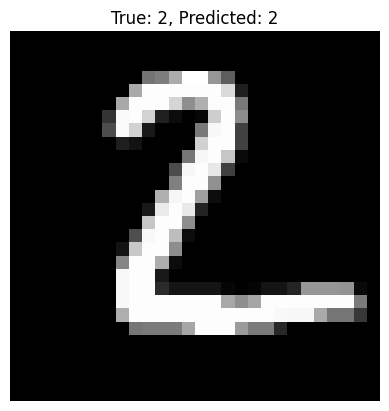

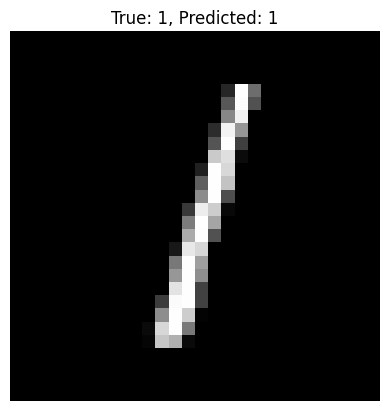

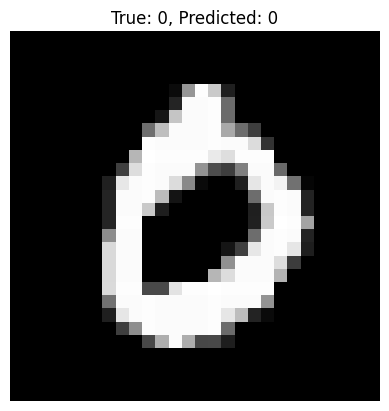

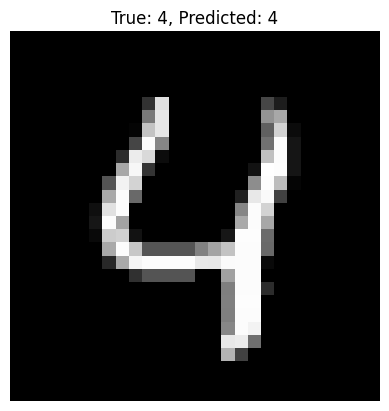

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test_cat)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Visualize predictions
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = model.predict(x_test_reshaped)

# Display 5 test images with their true and predicted labels
for i in range(5):
    plt.imshow(x_test_reshaped[i].reshape(28, 28), cmap='gray')
    true_label = np.argmax(y_test_cat[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()